In [2]:
import networkx as nx
import numpy as np
import random
import nltk
import pandas as pd
import pickle

In [3]:
letters = ['q', 'w', 'e', 'r', 't', 'y', 'u', 'i', 'o', 'p',
           'a', 's', 'd', 'f', 'g', 'h', 'j', 'k', 'l',
           'z', 'x', 'c', 'v', 'b', 'n', 'm']

In [4]:
# f = open('words/google-10000-english.txt', 'r')
# words = f.readlines()
# words = [word.rstrip() for word in words if len(word.rstrip()) > 1]

In [4]:
df = pd.read_pickle('words/freqword.p')

In [13]:
df.set_index('word', inplace=True)

In [15]:
words = df.to_dict('index')

In [ ]:
str.isalpha

In [22]:
words = {key:words[key] for key in words.keys() if key.isalpha()}

In [25]:
words

{'the': {'zipf': 7.77, 'freq': 0.0589},
 'of': {'zipf': 7.45, 'freq': 0.0282},
 'to': {'zipf': 7.44, 'freq': 0.0275},
 'and': {'zipf': 7.41, 'freq': 0.0257},
 'a': {'zipf': 7.36, 'freq': 0.0229},
 'in': {'zipf': 7.29, 'freq': 0.0195},
 'i': {'zipf': 7.11, 'freq': 0.0129},
 'is': {'zipf': 7.06, 'freq': 0.0115},
 'that': {'zipf': 7.02, 'freq': 0.0105},
 'for': {'zipf': 7.01, 'freq': 0.0102},
 'you': {'zipf': 6.99, 'freq': 0.00977},
 'it': {'zipf': 6.96, 'freq': 0.00912},
 'on': {'zipf': 6.92, 'freq': 0.00832},
 'with': {'zipf': 6.85, 'freq': 0.00708},
 'was': {'zipf': 6.84, 'freq': 0.00692},
 'be': {'zipf': 6.8, 'freq': 0.00631},
 'this': {'zipf': 6.8, 'freq': 0.00631},
 'as': {'zipf': 6.79, 'freq': 0.00617},
 'are': {'zipf': 6.74, 'freq': 0.0055},
 'not': {'zipf': 6.71, 'freq': 0.00513},
 'have': {'zipf': 6.7, 'freq': 0.00501},
 'at': {'zipf': 6.69, 'freq': 0.0049},
 'he': {'zipf': 6.69, 'freq': 0.0049},
 'by': {'zipf': 6.68, 'freq': 0.00479},
 'from': {'zipf': 6.63, 'freq': 0.00427},
 

In [6]:
def define_graph(G_left, G_right):
    G_left.add_nodes_from(range(0,15))
    G_right.add_nodes_from(range(0,11))

    G_left.add_edge(0, 1)
    G_left.add_edge(0, 5)
    G_left.add_edge(0, 6)

    G_left.add_edge(1, 2)
    G_left.add_edge(1, 5)
    G_left.add_edge(1, 6)
    G_left.add_edge(1, 7)

    G_left.add_edge(2, 3)
    G_left.add_edge(2, 6)
    G_left.add_edge(2, 7)
    G_left.add_edge(2, 8)

    G_left.add_edge(3, 4)
    G_left.add_edge(3, 7)
    G_left.add_edge(3, 8)
    G_left.add_edge(3, 9)

    G_left.add_edge(4, 8)
    G_left.add_edge(4, 9)

    G_left.add_edge(5, 6)
    G_left.add_edge(5, 10)
    G_left.add_edge(5, 11)

    G_left.add_edge(6, 7)
    G_left.add_edge(6, 10)
    G_left.add_edge(6, 11)
    G_left.add_edge(6, 12)

    G_left.add_edge(7, 8)
    G_left.add_edge(7, 11)
    G_left.add_edge(7, 12)
    G_left.add_edge(7, 13)

    G_left.add_edge(8, 9)
    G_left.add_edge(8, 12)
    G_left.add_edge(8, 13)
    G_left.add_edge(8, 14)

    G_left.add_edge(9, 13)
    G_left.add_edge(9, 14)

    G_left.add_edge(10, 11)
    G_left.add_edge(11, 12)
    G_left.add_edge(12, 13)
    G_left.add_edge(13, 14)


    G_right.add_edge(0, 1)
    G_right.add_edge(0, 5)
    G_right.add_edge(0, 6)

    G_right.add_edge(1, 2)
    G_right.add_edge(1, 5)
    G_right.add_edge(1, 6)
    G_right.add_edge(1, 7)

    G_right.add_edge(2, 3)
    G_right.add_edge(2, 6)
    G_right.add_edge(2, 7)
    G_right.add_edge(2, 8)

    G_right.add_edge(3, 4)
    G_right.add_edge(3, 7)
    G_right.add_edge(3, 8)

    G_right.add_edge(4, 8)

    G_right.add_edge(5, 6)
    G_right.add_edge(5, 9)
    G_right.add_edge(5, 10)

    G_right.add_edge(6, 7)
    G_right.add_edge(6, 9)
    G_right.add_edge(6, 10)

    G_right.add_edge(7, 8)
    G_right.add_edge(9, 10)

In [7]:
def make_rnd_keyboard_layout(G_left, G_right):
    left_attrs = {}
    right_attrs = {}
    
    tmp = letters.copy()
    for i in range(15):
        left_letter = random.choice(tmp)
        left_attrs[i] = left_letter
        tmp.remove(left_letter)
        
        if i <= 10:
            right_letter = random.choice(tmp)
            right_attrs[i] = right_letter
            tmp.remove(right_letter)
    G_left = nx.relabel_nodes(G_left, left_attrs)
    G_right = nx.relabel_nodes(G_right, right_attrs)
    return G_left, G_right

In [8]:
def create_graphs_dict(num:int):
    d_left = {}
    d_right = {}
    for i in range(num):
        d_left["{0}".format(i)] = nx.Graph()
        d_right["{0}".format(i)] = nx.Graph()
        define_graph(d_left["{0}".format(i)], d_right["{0}".format(i)])
        d_left["{0}".format(i)],d_right["{0}".format(i)] =  make_rnd_keyboard_layout(d_left["{0}".format(i)], d_right["{0}".format(i)])
        
    return d_left, d_right

In [9]:
def mutation(G_left, G_right):
    indexes = random.sample(range(26), 2)
    G_left_list = list(G_left.nodes)
    G_right_list = list(G_right.nodes)
    
    if indexes[0] <= 14 and indexes[1] <= 14:
        l = G_left_list[indexes[0]]
        r = G_left_list[indexes[1]]

        G_left = nx.relabel_nodes(G_left, {l:r, r:l})        
    elif indexes[0] <= 14 and indexes[1] > 14:
        l = G_left_list[indexes[0]]
        r = G_right_list[indexes[1]-15]
        
        G_left = nx.relabel_nodes(G_left, {l:r})
        G_right = nx.relabel_nodes(G_right, {r:l})
    elif indexes[0] > 14 and indexes[1] <= 14:
        l = G_left_list[indexes[1]]
        r = G_right_list[indexes[0]-15]
        
        G_left = nx.relabel_nodes(G_left, {l:r})
        G_right = nx.relabel_nodes(G_right, {r:l})
    elif indexes[0] > 14 and indexes[1] > 14:
        l = G_right_list[indexes[0]-15]
        r = G_right_list[indexes[1]-15]
        
        G_right = nx.relabel_nodes(G_right, {l:r, r:l})   

In [10]:
def set_keyboard_layout(G_left, G_right, tab):
    left_attrs = {}
    right_attrs = {}

    for i in range(15):
        left_attrs[i] = tab[i]
    for i in range(11):
        right_attrs[i] = tab[15+i]

    G_left = nx.relabel_nodes(G_left, left_attrs)
    G_right = nx.relabel_nodes(G_right, right_attrs)

    return G_left, G_right

In [11]:
def crossover(G_left1, G_right1, G_left2, G_right2):
    """Executes a partially matched crossover (PMX) on the input individuals"""
    ind1, ind2 = [], []  
    G_left_list1, G_left_list2 = list(G_left1.nodes), list(G_left2.nodes)
    G_right_list1, G_right_list2 = list(G_right1.nodes), list(G_right2.nodes)
    
    for i in range(15):
        ind1.append(G_left_list1[i])
        ind2.append(G_left_list2[i])
    for i in range(11):
        ind1.append(G_right_list1[i])
        ind2.append(G_right_list2[i])
    
    size = min(len(ind1), len(ind2))
    p1, p2 = [0] * size, [0] * size
    
    cxpoint1 = random.randint(0, size)
    cxpoint2 = random.randint(0, size - 1)
    
    if cxpoint2 >= cxpoint1:
        pass
    else:  # Swap the two cx points
        cxpoint1, cxpoint2 = cxpoint2, cxpoint1
        
    for i in range(cxpoint1, cxpoint2):
        temp1 = ind1.index(ind1[i])
        temp2 = ind2.index(ind2[i])
        # Swap the matched value
        ind1[i], ind1[p1[temp2]] = ind2[i], ind1[i]
        ind2[i], ind2[p2[temp1]] = ind1[i], ind2[i]
        # Position bookkeeping
        p1[temp1], p1[temp2] = p1[temp2], p1[temp1]
        p2[temp1], p2[temp2] = p2[temp2], p2[temp1]
        
    set_keyboard_layout(G_left1, G_right1, ind1)
    set_keyboard_layout(G_left2, G_right2, ind2)

In [132]:
#crossover(d_left['0'], d_right['0'], d_left['1'], d_right['1'])

In [55]:
def score_word(word, zipf, G_left_nodes, G_right_nodes, spl_G_left, spl_G_right):
    hand = 'left' if word[0] in G_left_nodes else 'right'
    sum_lenght = 0
    for i in range(len(word)-1):
        if hand == 'left':
#             print('left')
            if word[i+1] in G_left_nodes:
                sum_lenght += spl_G_left[word[i]][word[i+1]]
            else:
                sum_lenght += 1
                hand = 'right'
        else:
#             print('right')
            if word[i+1] in G_right_nodes:
                sum_lenght += spl_G_right[word[i]][word[i+1]]
            else:
                sum_lenght += 1
                hand = 'left'
    return sum_lenght * zipf

In [56]:
def score(word_list, G_left, G_right):
    G_left_nodes = G_left.nodes()
    G_right_nodes = G_right.nodes()
    spl_G_left = dict(nx.all_pairs_shortest_path_length(G_left))
    spl_G_right = dict(nx.all_pairs_shortest_path_length(G_right))
    sum_len = 0
    for word in word_list.keys():
        sum_len += score_word(word, word_list[word]['freq'], G_left_nodes, G_right_nodes, spl_G_left, spl_G_right)
    return len(word_list)/sum_len

In [57]:
import numpy.random as npr

"""
def selectOne(d_left, d_right, fitness):
    max = sum(fitness)
    selection_probs = [c/max for c in fitness]
    #print(selection_probs)
    return npr.choice(min(len(d_left), len(d_right)), p=selection_probs)

def selection(d_left, d_right, fitness):
    length = min(len(d_left), len(d_right))
    for i in range(length):
        chosen = selectOne(d_left, d_right, fitness)
        d_left['{}'.format(i)] = d_left['{}'.format(chosen)]
        d_right['{}'.format(i)] = d_right['{}'.format(chosen)]
"""

def selectOne(tournament, fitness):
    fit = [fitness[i] for i in tournament]
    max_index = fitness.index(max(fit))
    return max_index

def selection(d_left, d_right, fitness, t):
    length = min(len(d_left), len(d_right))
    for i in range(length):
        r = random.randint(1, t)
        tour = random.sample(range(0,length), r)
        chosen = selectOne(tour, fitness)
        d_left['{}'.format(i)] = d_left['{}'.format(chosen)]
        d_right['{}'.format(i)] = d_right['{}'.format(chosen)]

In [58]:
"""
d_left, d_right = create_graphs_dict(200)

fitness = [ score(words, l, r) for i,(l,r) in enumerate(zip(d_left.values(), d_right.values())) ]

selection(d_left, d_right, fitness)
"""

'\nd_left, d_right = create_graphs_dict(200)\n\nfitness = [ score(words, l, r) for i,(l,r) in enumerate(zip(d_left.values(), d_right.values())) ]\n\nselection(d_left, d_right, fitness)\n'

In [59]:
import itertools

def algorithm(d_left, d_right, steps, mutation_prob=0, crossover_prob=0, t=5):
    
    sum_list = []
    max_list = []
    min_list = []
    max_score = 0
    max_index = 0
    
    length = min(len(d_left), len(d_right))
    for i in range(steps):
        print('Generation {}'.format(i))
        
        fitness = [ score(words, l, r) for i,(l,r) in enumerate(zip(d_left.values(), d_right.values())) ]
        print('sum fitness = ', sum(fitness))
        sum_list.append(sum(fitness))
        print('max fitness = ', max(fitness))
        print('max index = ', fitness.index(max(fitness)))
        if max_score < max(fitness):
            max_score = max(fitness)
            max_index = fitness.index(max(fitness))
        print('min fitness = ', min(fitness))
        min_list.append(min(fitness))        

        selection(d_left, d_right, fitness, t)
         
        for y in range(length):
            if crossover_prob >= npr.rand():
                p = random.sample(range(length), 2)
                crossover(d_left['{}'.format(p[0])], d_right['{}'.format(p[0])],
                          d_left['{}'.format(p[1])], d_right['{}'.format(p[1])])
        
        for l,r in zip(d_left.values(), d_right.values()):
            if mutation_prob >= npr.rand():
                mutation(l, r)
                
    return sum_list, max_list, min_list, max_score, max_index

In [67]:
%%time
d_left, d_right = create_graphs_dict(200)

sum_list, max_list, min_list, max_score, max_index = algorithm(d_left, d_right, 15, 0.5, 0.5, 5)

Generation 0
sum fitness =  79346.45960416184
max fitness =  479.7156704101921
max index =  63
min fitness =  332.7795147349124
Generation 1
sum fitness =  83001.61472247682
max fitness =  465.394458391101
max index =  45
min fitness =  336.44064837826096
Generation 2
sum fitness =  87248.39148071832
max fitness =  465.394458391101
max index =  22
min fitness =  391.9847742266323
Generation 3
sum fitness =  90971.89249427056
max fitness =  465.394458391101
max index =  13
min fitness =  422.74922595680204
Generation 4
sum fitness =  91406.4521074266
max fitness =  457.03226053713297
max index =  0
min fitness =  457.03226053713297
Generation 5
sum fitness =  91406.4521074266
max fitness =  457.03226053713297
max index =  0
min fitness =  457.03226053713297
Generation 6
sum fitness =  91406.4521074266
max fitness =  457.03226053713297
max index =  0
min fitness =  457.03226053713297
Generation 7
sum fitness =  91406.4521074266
max fitness =  457.03226053713297
max index =  0
min fitness

In [51]:
d_left['{}'.format(max_index)].nodes, d_right['{}'.format(max_index)].nodes

(NodeView(('z', 't', 'a', 'h', 'm', 'q', 'k', 'w', 'i', 'y', 'u', 'c', 'b', 'f', 'v')),
 NodeView(('j', 'o', 'd', 'l', 'x', 's', 'e', 'p', 'g', 'r', 'n')))

In [61]:
d_left['{}'.format(max_index)].nodes, d_right['{}'.format(max_index)].nodes

(NodeView(('f', 'i', 'c', 'q', 'p', 'v', 'd', 'u', 'w', 'g', 'l', 'k', 'y', 'j', 'h')),
 NodeView(('b', 'a', 'o', 'x', 'z', 'e', 'r', 's', 't', 'm', 'n')))

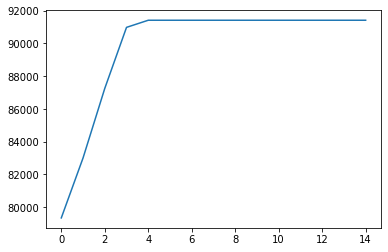

In [68]:
import matplotlib.pyplot as plt
plt.plot(sum_list)

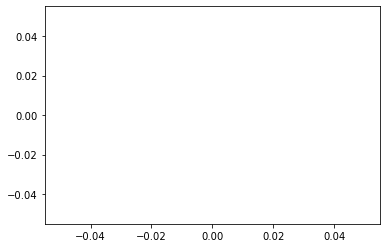

In [36]:
plt.plot(max_list)

In [37]:
qwerty =  ['q', 'w', 'e', 'r', 't', 
           'a', 's', 'd', 'f', 'g',
           'z', 'x', 'c', 'v', 'b',
           
           'y', 'u', 'i', 'o', 'p',
           'h', 'j', 'k', 'l',
           'n', 'm']

qwerty_left = nx.Graph()
qwerty_right = nx.Graph()
define_graph(qwerty_left, qwerty_right)
qwerty_left, qwerty_right = set_keyboard_layout(qwerty_left, qwerty_right, qwerty)

qwerty_left.nodes, qwerty_right.nodes

(NodeView(('q', 'w', 'e', 'r', 't', 'a', 's', 'd', 'f', 'g', 'z', 'x', 'c', 'v', 'b')),
 NodeView(('y', 'u', 'i', 'o', 'p', 'h', 'j', 'k', 'l', 'n', 'm')))

In [38]:
score(words, qwerty_left, qwerty_right)

0.03206399354686923

In [144]:
#nx.draw(G=d_left['{}'.format(max_index)], with_labels = True)

In [145]:
#nx.draw(d_right['{}'.format(max_index)], with_labels = True)